## DFS (Depth-First Search)

**Definition :** DFS is an algorithm for traversing a tree or graph vertically. 

In [1]:
my_dict = {
    "a": ["b", "g"],
    "b": [ "c", "d", "e"],
    "e": ["f"],
    "g": ["h"],
    "h": ["i"]
}

In the above code, I have defined a tree. Its representation is shown in the image below.

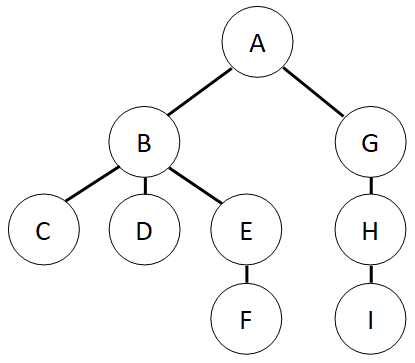

#### **Implementation**

Here, we start from a node (often the root of the tree). We then place this node in the list of nodes to visit (called the stack).

Now, as long as the list of nodes to visit is not empty, the algorithm will continue and each time a node is visited, its children will be added to the list of nodes to visit.

The difference with BFS is that the nodes added won't be placed at the end of the list but will be the next to be visited.

In [2]:
def dfs(graph, start_node):
    visited = []
    stack = []

    if start_node not in graph:
        return []

    stack.append(start_node)

    while stack:
        node = stack.pop()
        if node not in visited:
            visited.append(node)

            if node in graph:
                for neighbor in reversed(graph[node]):
                    stack.append(neighbor)
    return visited

#### **Testing**

We can check that the output of our example will be the letters a to i in alphabetical order.

In [3]:
dfs(my_dict, 'a')

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

#### **Real-life problem**

Among other things, this algorithm can be used to find all paths and performs very well with a maze.

Let's imagine we have a maze and we can only go top, bottom, left or right. In this case, we can use the DFS to go through all the paths to find the start and the end.

In [4]:
def solve_maze_dfs(maze, start_coords, end_coords):
    rows = len(maze)
    cols = len(maze[0])
    
    # Stack stores tuples: (current_coords, path_to_current_coords)
    stack = [(start_coords, [start_coords])]
    
    visited = set()
    visited.add(start_coords)

    print(f"Starting maze search from {start_coords} to {end_coords}...")

    # Define possible moves (up, down, left, right)
    dr = [-1, 1, 0, 0] # Change in row: up, down, no change, no change
    dc = [0, 0, -1, 1] # Change in col: no change, no change, left, right

    while stack:
        current_coords, path = stack.pop()

        print(f"  Exploring from: {current_coords} (Path so far: {path})")

        if current_coords == end_coords:
            print(f"  Destination {end_coords} reached!")
            return path

        for i in range(4): # Iterate through the 4 possible directions
            next_row, next_col = current_coords[0] + dr[i], current_coords[1] + dc[i]
            next_coords = (next_row, next_col)

            # Check if the next coordinates are within maze bounds
            is_valid_row = 0 <= next_row < rows
            is_valid_col = 0 <= next_col < cols

            if is_valid_row and is_valid_col:
                # Check if the next cell is not a wall and not already visited
                if maze[next_row][next_col] != '#' and next_coords not in visited:
                    visited.add(next_coords)
                    new_path = path + [next_coords]
                    stack.append((next_coords, new_path))
                    print(f"    Adding neighbor: {next_coords} (New path: {new_path})")

    # If the stack becomes empty and destination was not found
    print(f"No path found from {start_coords} to {end_coords}.")
    return None

In [5]:
# --- Example Usage: A Simple Maze ---
# S = Start, E = End, # = Wall, . = Path

# Scenario 1: A maze with walls and a clear path
sample_maze = [
    ['S', '#', '.', '#', '.', '.'],
    ['.', '#', '.', '#', '.', '#'],
    ['.', '.', '.', '.', '.', '.'],
    ['#', '#', '.', '#', '#', '.'],
    ['.', '.', '.', '.', '.', '.'],
    ['.', '#', '#', '.', '#', 'E']
]

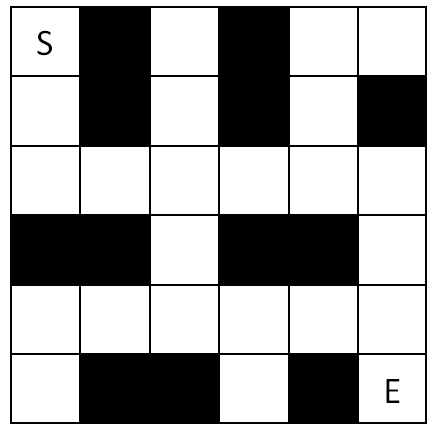

In [6]:
# Find start and end coordinates for sample_maze
start_coords = None
end_coords = None
for r in range(len(sample_maze)):
    for c in range(len(sample_maze[0])):
        if sample_maze[r][c] == 'S':
            start_coords = (r, c)
        elif sample_maze[r][c] == 'E':
            end_coords = (r, c)

print("--- Scenario 1: Solving a path in a larger maze ---")
path_found = solve_maze_dfs(sample_maze, start_coords, end_coords)

if path_found:
    print(f"\nPath found: {path_found}")
    display_maze = [row[:] for row in sample_maze]
    for r, c in path_found:
        if display_maze[r][c] not in ['S', 'E']:
            display_maze[r][c] = '*' # Mark path with an asterisk
    print("\nMaze with path:")
    for row in display_maze:
        print(" ".join(row))
else:
    print("\nCould not find a path in the maze.")

--- Scenario 1: Solving a path in a larger maze ---
Starting maze search from (0, 0) to (5, 5)...
  Exploring from: (0, 0) (Path so far: [(0, 0)])
    Adding neighbor: (1, 0) (New path: [(0, 0), (1, 0)])
  Exploring from: (1, 0) (Path so far: [(0, 0), (1, 0)])
    Adding neighbor: (2, 0) (New path: [(0, 0), (1, 0), (2, 0)])
  Exploring from: (2, 0) (Path so far: [(0, 0), (1, 0), (2, 0)])
    Adding neighbor: (2, 1) (New path: [(0, 0), (1, 0), (2, 0), (2, 1)])
  Exploring from: (2, 1) (Path so far: [(0, 0), (1, 0), (2, 0), (2, 1)])
    Adding neighbor: (2, 2) (New path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2)])
  Exploring from: (2, 2) (Path so far: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2)])
    Adding neighbor: (1, 2) (New path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (1, 2)])
    Adding neighbor: (3, 2) (New path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2)])
    Adding neighbor: (2, 3) (New path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3)])
  Exploring from: (2, 3) (Path so 

**Path found**

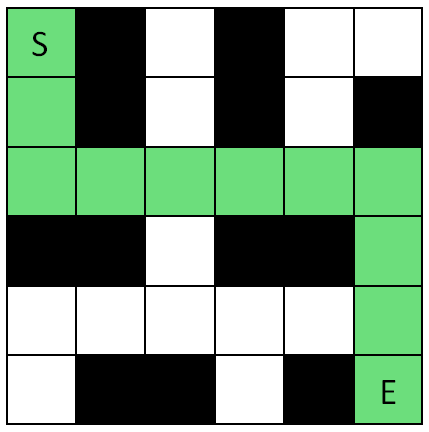